### Modeling COCO - QA
* [Review](https://arxiv.org/abs/1610.01465)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/coco-qa/'
COLUMN = 'embeddings'

In [3]:
text_path = 'text_embeddings.csv'
images_path = 'Embeddings_dinov2_base.csv'

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

questions  image_id     answers  \
0          what is using umbrellas as a central theme    397899   sculpture   
1          what walks toward the rope perimeter fence    310683    elephant   
2                     what is the color of the horses     23004       brown   
3                  where is the black cat laying down    117931        sink   
4                  what is the color of the character    220218      purple   
...                                               ...       ...         ...   
117679           what are there grouped together here    406426  vegetables   
117680               what serves as the train trestle    545581      bridge   
117681                 what is the color of the plate     40404       white   
117682             what is sleeping on the blue couch    570521         cat   
117683  how many people on a boat rowing in the water    139440         six   

        types  split                                         embeddings  
0           0  train  [3.8792498111724854, -0.3373020589351654, 2.72...  
1           0  train  [1.2933942079544067, -1.494146466255188, 0.500...  
2           2  train  [2.9307196140289307, -2.889282464981079, -0.60...  
3           3  train  [1.9963053464889526, -0.6492555737495422, 1.77...  
4           2  train  [-0.5075816512107849, -1.5164475440979004, 0.1...  
...       ...    ...                                                ...  
117679      0   test  [3.4933199882507324, -2.6558287143707275, 1.05...  
117680      0   test  [2.689941167831421, -2.478192090988159, 0.2251...  
117681      2   test  [0.622462809085846, -2.8684604167938232, -0.40...  
117682      0   test  [3.501220941543579, -1.2031269073486328, 3.914...  
117683      1   test  [2.665867328643799, -1.1556822061538696, 2.653...  

[117684 rows x 6 columns]

### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

ImageName         0         1         2         3         4  \
0  000000492164.jpg -4.120322 -0.861838 -1.574686 -0.377600 -1.143290   
1  000000494240.jpg  1.262150 -2.545208 -2.214187 -0.438926 -1.460701   
2  000000546298.jpg  1.854058 -2.434641 -4.676404 -5.156973  1.956929   
3  000000001072.jpg  3.776999 -0.392807 -0.368420 -0.723537 -4.110651   
4  000000147839.jpg -2.418237 -0.741610 -0.355587  0.453301 -1.957395   

          5         6         7         8  ...       758       759       760  \
0 -0.820529 -1.464788 -0.585527  1.565520  ...  2.156492  0.733686 -1.684320   
1 -2.933234  0.679571 -1.260704  1.990085  ... -1.215957  0.795889 -3.177773   
2 -1.904949 -1.089629  2.075478  1.904752  ... -0.909014  0.605903  2.549776   
3 -1.411750  3.034316 -1.959409 -0.382609  ... -0.334199  3.178964 -1.243339   
4  0.979703 -0.256348 -1.298923  0.808389  ... -0.255671  2.633270 -1.671388   

        761       762       763       764       765       766       767  
0  1.899588  1.202093  1.046192  3.336528  1.648984  3.385030 -1.749917  
1  1.399150 -0.923868 -1.138168 -2.748717 -0.460910 -4.501886 -1.589762  
2  0.116877  1.654576  0.535118  0.283361 -0.588969  1.246408  1.329121  
3  0.818931 -0.288869 -0.211096  2.510984 -1.331091  0.323675 -0.178847  
4  0.967470 -3.105538  0.939509 -2.398648 -0.562799 -2.257563 -2.392581  

[5 rows x 769 columns]

### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "image_id", "ImageName")
df.to_csv(os.path.join(PATH, 'embeddings.csv'), index=False)
df.head()

questions    answers  types  split  \
0       what is using umbrellas as a central theme  sculpture      0  train   
1       what does the piece of modern art comprise  umbrellas      0  train   
2  what is this sculpture using as a central theme  umbrellas      0  train   
3               what is the color of the umbrellas      white      2  train   
4       what walks toward the rope perimeter fence   elephant      0  train   

     text_1    text_2    text_3    text_4    text_5    text_6  ...  image_758  \
0  3.879250 -0.337302  2.728295 -0.177727 -0.734334 -0.124322  ...  -0.291306   
1  3.165886 -1.776468  0.702027  1.142665 -1.085440  0.059205  ...  -0.291306   
2  2.890666 -1.778237  3.530624 -0.772094 -0.794132 -0.311388  ...  -0.291306   
3  1.495979 -2.096776 -0.237311  0.309544 -0.410521 -1.360798  ...  -0.291306   
4  1.293394 -1.494146  0.500123 -0.098010 -0.942691 -2.122753  ...  -3.133440   

   image_759  image_760  image_761  image_762  image_763  image_764  \
0   -0.26227  -0.227479  -1.403986   0.079803    0.14777  -1.023563   
1   -0.26227  -0.227479  -1.403986   0.079803    0.14777  -1.023563   
2   -0.26227  -0.227479  -1.403986   0.079803    0.14777  -1.023563   
3   -0.26227  -0.227479  -1.403986   0.079803    0.14777  -1.023563   
4    1.22679  -4.741875   1.580570   0.571090   -0.75397  -0.807536   

   image_765  image_766  image_767  
0   0.193850   0.246949  -2.262336  
1   0.193850   0.246949  -2.262336  
2   0.193850   0.246949  -2.262336  
3   0.193850   0.246949  -2.262336  
4   0.534862  -1.499307   1.479312  

[5 rows x 4868 columns]

## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'answers'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (78736, 4868)
Test Shape: (38948, 4868)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
The number of parameters of the model are: 678446
Epoch 1/20 - Test Accuracy: 0.5435, macro-f1: 0.2115
Epoch 1/20 - Training Time: 6.09 seconds | Inference Time: 5.13 seconds
Epoch 2/20 - Test Accuracy: 0.5644, macro-f1: 0.2660
Epoch 2/20 - Training Time: 6.12 seconds | Inference Time: 5.20 seconds
Epoch 3/20 - Test Accuracy: 0.5699, macro-f1: 0.2921
Epoch 3/20 - Training Time: 6.05 seconds | Inference Time: 5.14 seconds
Epoch 4/20 - Test Accuracy: 0.5759, macro-f1: 0.3118
Epoch 4/20 - Training Time: 16.65 seconds | Inference Time: 5.13 seconds
Epoch 5/20 - Test Accuracy: 0.5802, macro-f1: 0.3157
Epoch 5/20 - Training Time: 6.89 seconds | Inference Time: 5.12 seconds
Epoch 6/20 - Test Accuracy: 0.5762, macro-f1: 0.3187
Epoch 6/20 - Training Time: 6.32 seconds | Inference Time: 5.10 seconds
Epoch 7/20 - Test Accuracy: 0.5722, macro-f1: 0.3245
Epoch 7/20 - Training Time: 5.85 seconds | Inference Time: 5.06 seconds
Epoch 8/20 - Test Accuracy: 0.5736, macro-f1:

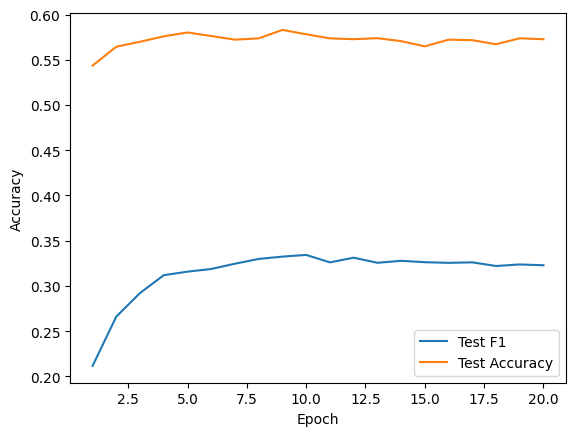

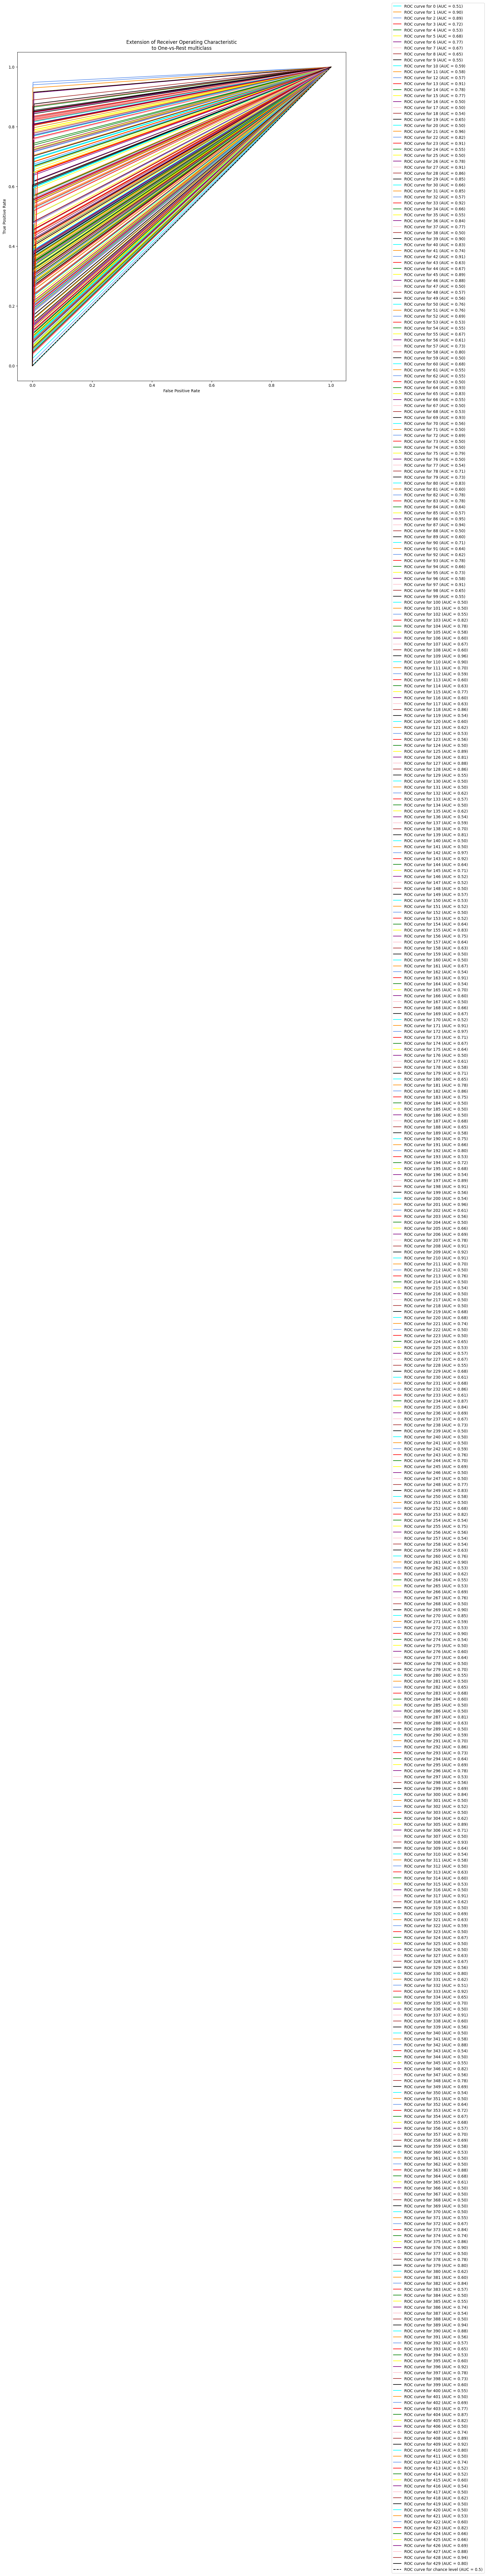

              precision    recall  f1-score   support

           0       0.10      0.02      0.04        41
           1       0.63      0.80      0.70       439
           2       0.71      0.77      0.74       163
           3       0.54      0.44      0.48        32
           4       0.17      0.07      0.10        15
           5       0.46      0.35      0.40        34
           6       0.74      0.55      0.63        31
           7       0.50      0.33      0.40        12
           8       0.30      0.30      0.30        10
           9       0.11      0.10      0.10        21
          10       0.13      0.18      0.15        11
          11       0.15      0.15      0.15        52
          12       0.19      0.14      0.16        29
          13       0.82      0.83      0.82       309
          14       0.55      0.57      0.56       116
          15       0.55      0.55      0.55        97
          16       0.00      0.00      0.00         7
          17       0.00    

In [10]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=20, multilabel=multilabel, report=True, set_weights=False, p=0.2)

Training Late Fusion Model:
The number of parameters of the model are: 367150
Epoch 1/20 - Test Accuracy: 0.5423, macro-f1: 0.2174
Epoch 1/20 - Training Time: 6.72 seconds | Inference Time: 5.24 seconds
Epoch 2/20 - Test Accuracy: 0.5759, macro-f1: 0.2919
Epoch 2/20 - Training Time: 6.30 seconds | Inference Time: 5.33 seconds
Epoch 3/20 - Test Accuracy: 0.5853, macro-f1: 0.3233
Epoch 3/20 - Training Time: 6.39 seconds | Inference Time: 5.23 seconds
Epoch 4/20 - Test Accuracy: 0.5893, macro-f1: 0.3319
Epoch 4/20 - Training Time: 6.27 seconds | Inference Time: 5.33 seconds
Epoch 5/20 - Test Accuracy: 0.5887, macro-f1: 0.3268
Epoch 5/20 - Training Time: 6.50 seconds | Inference Time: 5.21 seconds
Epoch 6/20 - Test Accuracy: 0.5876, macro-f1: 0.3407
Epoch 6/20 - Training Time: 6.48 seconds | Inference Time: 5.31 seconds
Epoch 7/20 - Test Accuracy: 0.5875, macro-f1: 0.3410
Epoch 7/20 - Training Time: 6.44 seconds | Inference Time: 5.20 seconds
Epoch 8/20 - Test Accuracy: 0.5927, macro-f1: 0

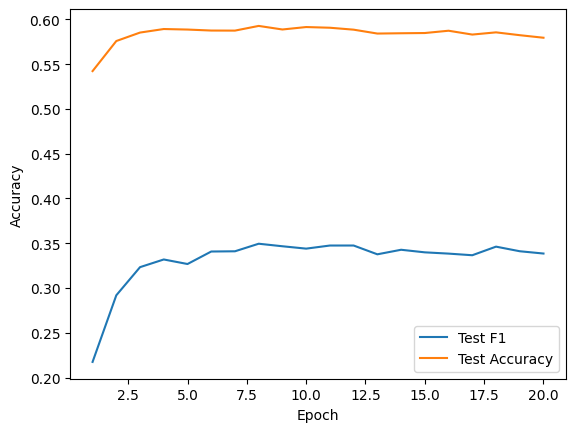

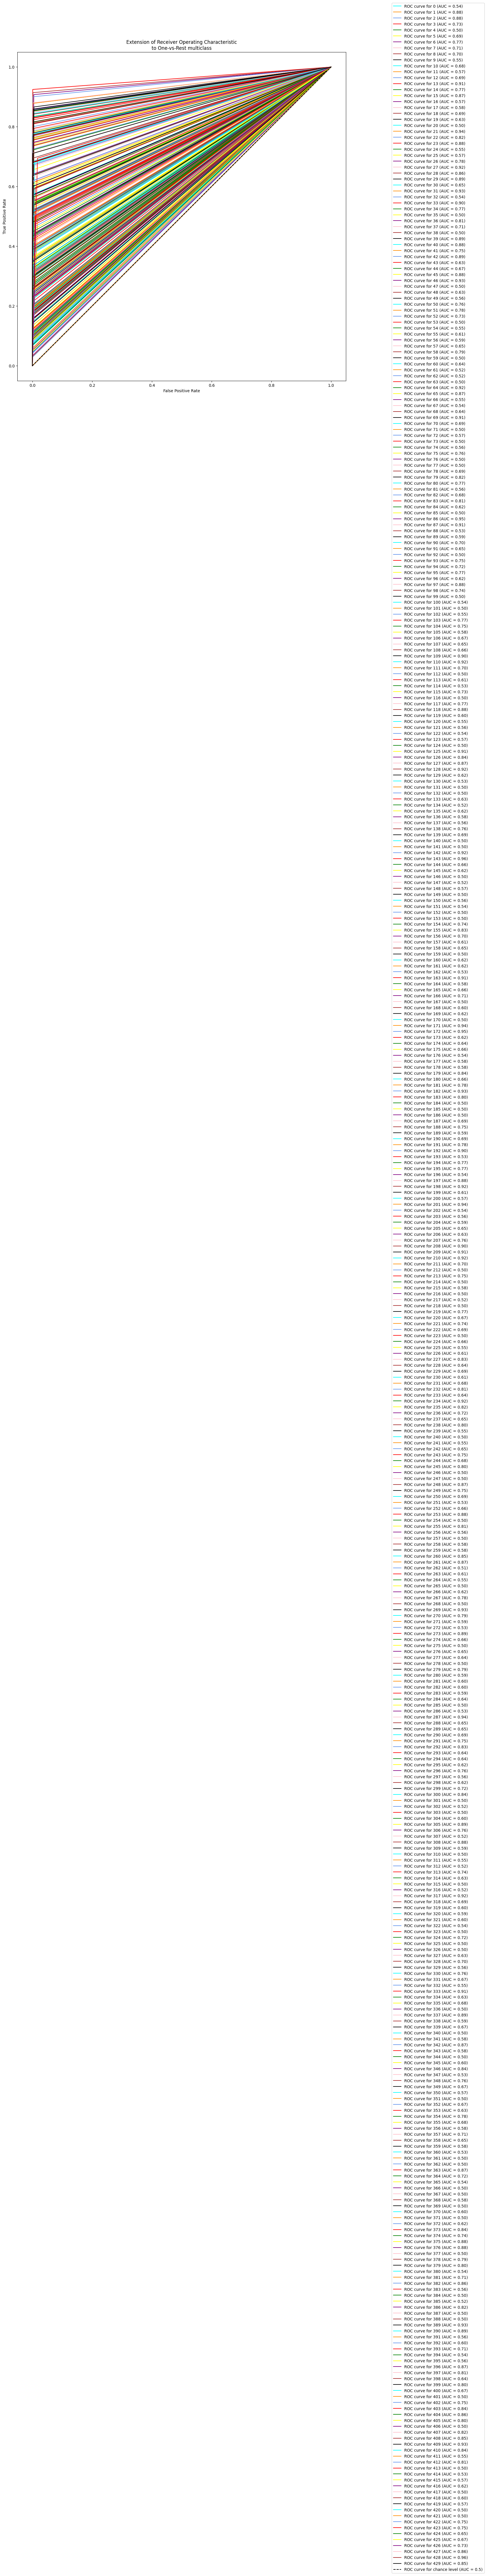

              precision    recall  f1-score   support

           0       0.19      0.07      0.11        41
           1       0.64      0.77      0.70       439
           2       0.65      0.75      0.70       163
           3       0.56      0.47      0.51        32
           4       0.00      0.00      0.00        15
           5       0.30      0.38      0.33        34
           6       0.47      0.55      0.51        31
           7       0.23      0.42      0.29        12
           8       0.80      0.40      0.53        10
           9       0.18      0.10      0.12        21
          10       0.57      0.36      0.44        11
          11       0.14      0.13      0.14        52
          12       0.31      0.38      0.34        29
          13       0.90      0.83      0.86       309
          14       0.73      0.54      0.62       116
          15       0.55      0.74      0.63        97
          16       0.14      0.14      0.14         7
          17       0.19    

In [11]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=20, multilabel=multilabel, report=True, set_weights=False, p=0.2)